# Heart Disease 

A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart attack.



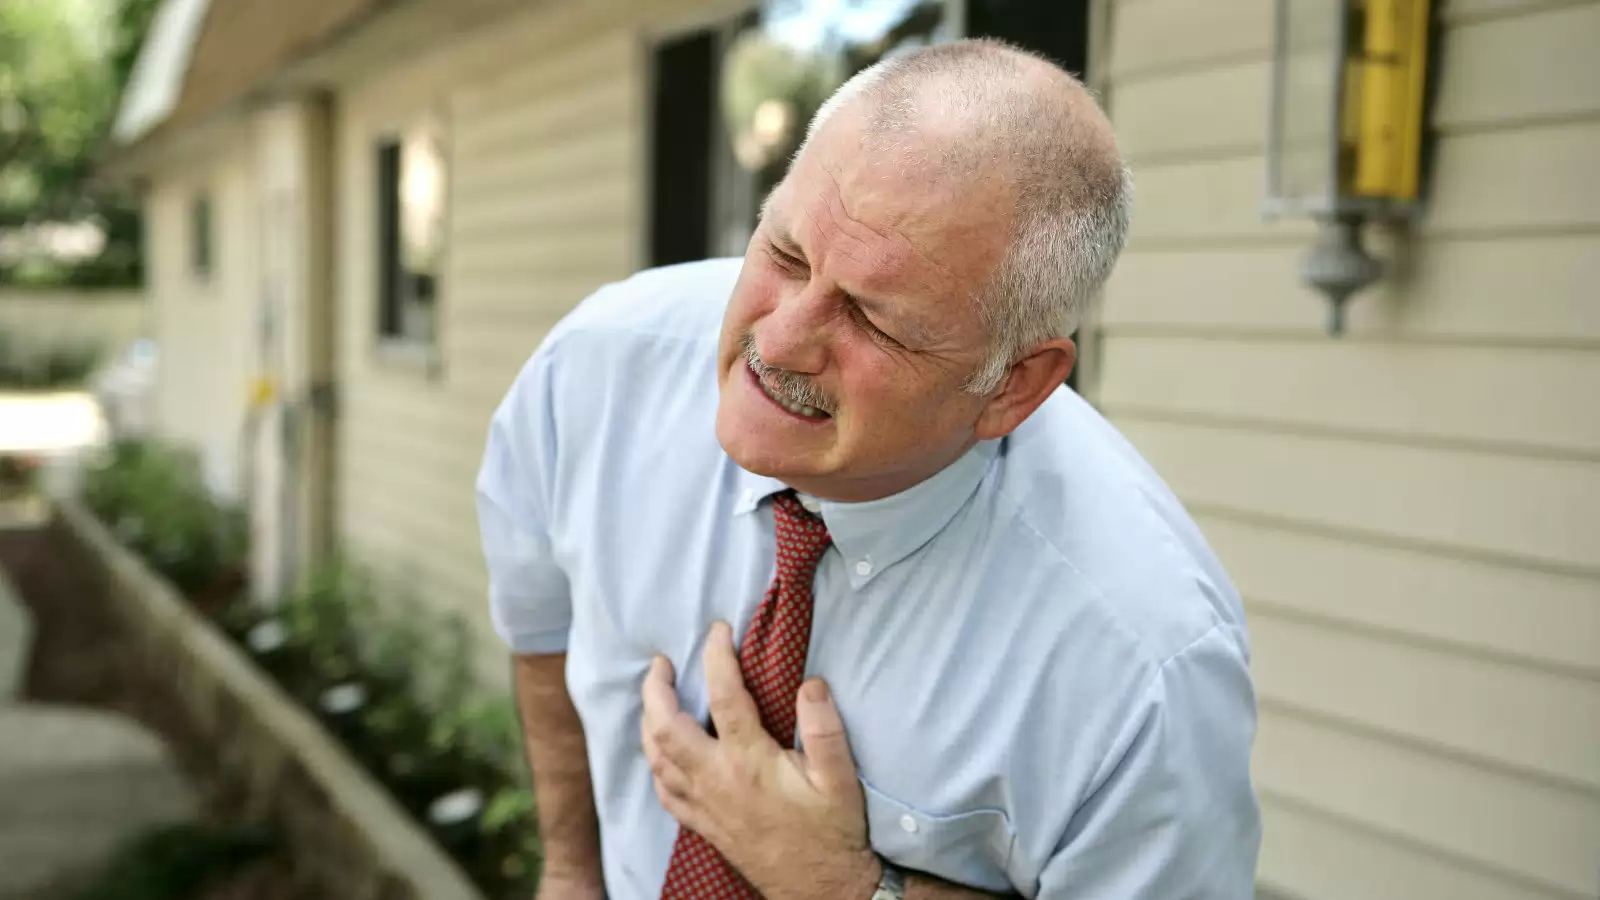




This dataset contain some medical information of patients which tells whether that person getting a heart attack chance is less or more. Using the information explore the dataset and classify the target variable using different Machine Learning models and findout which algorithm suitable for this dataset.



### Importing  Packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#df = pd.read_csv("datasets_737503_1278636_heart.csv")
df =pd.read_csv("hart1.csv")

### EDA

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape

(302, 14)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

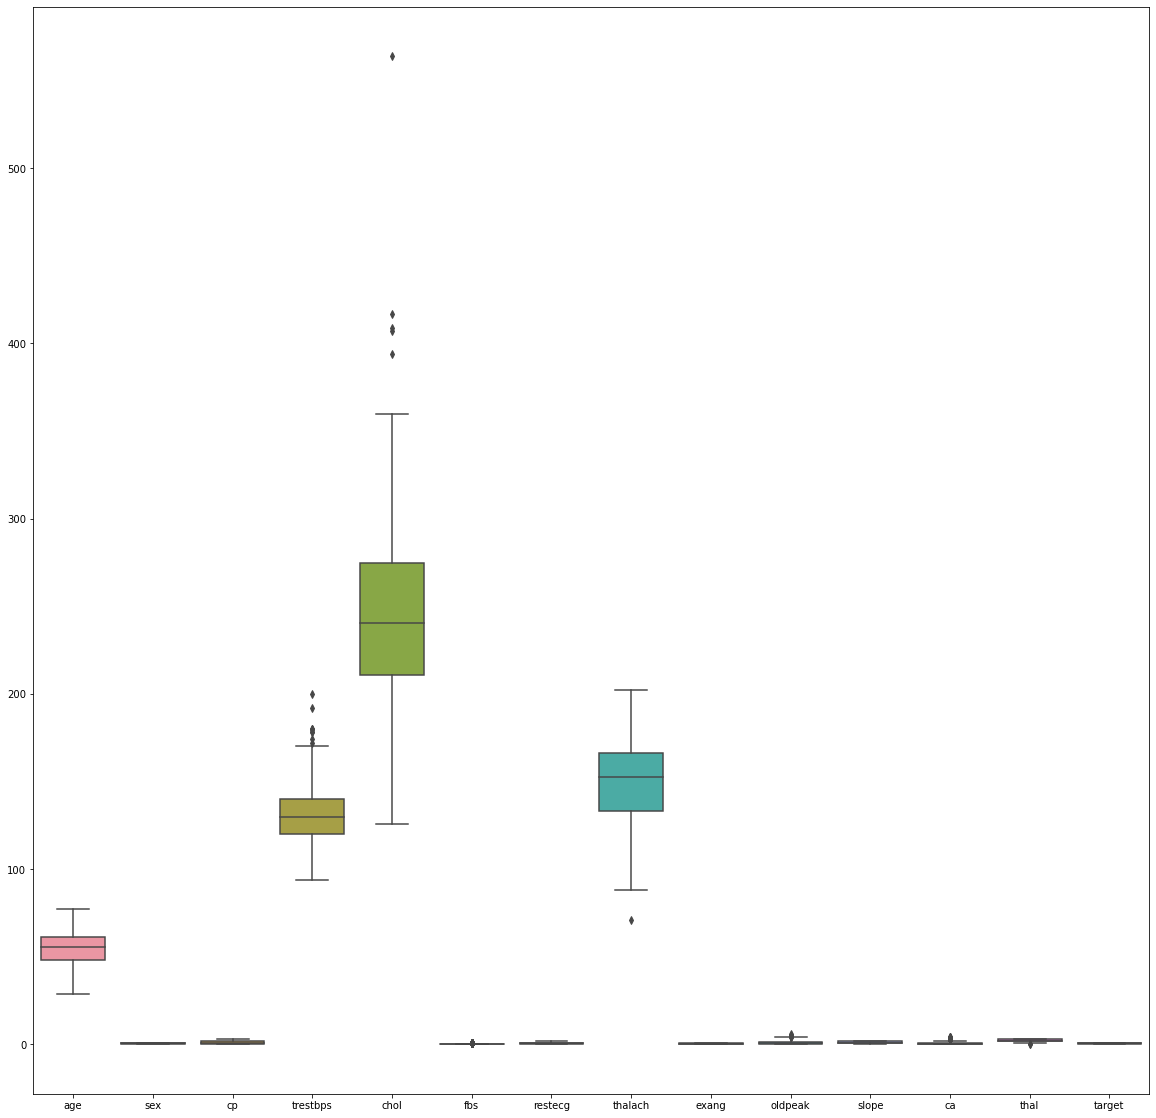

In [9]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

In [10]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[0.94979429 0.68265615 1.97647049 ... 0.71491124 2.1479552  0.91731315]
 [1.92854796 0.68265615 1.005911   ... 0.71491124 0.51399432 0.91731315]
 [1.48572607 1.46486632 0.0353515  ... 0.71491124 0.51399432 0.91731315]
 ...
 [1.50332164 0.68265615 0.93520799 ... 1.27497996 1.11996657 1.09014026]
 [0.28556146 0.68265615 0.93520799 ... 0.28003436 1.11996657 1.09014026]
 [0.28556146 1.46486632 0.0353515  ... 0.28003436 0.51399432 1.09014026]]


In [11]:
threshold = 3
print(np.where(z>3))

(array([ 28,  48,  85,  92, 158, 163, 203, 219, 220, 222, 245, 247, 250,
       271, 280], dtype=int64), array([ 4, 12,  4, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [12]:
Q1 =df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR =Q3-Q1
print(IQR)

age         13.00
sex          1.00
cp           2.00
trestbps    20.00
chol        63.75
fbs          0.00
restecg      1.00
thalach     32.75
exang        1.00
oldpeak      1.60
slope        1.00
ca           1.00
thal         1.00
target       1.00
dtype: float64


In [13]:
df  = df[(z < 3).all(axis=1)]
df.shape

(287, 14)

In [14]:
df = df[~((df < (Q1 - 1.5* IQR)) | (df > (Q3 + 1.5 *IQR))).any(axis=1)]
df.shape

(228, 14)

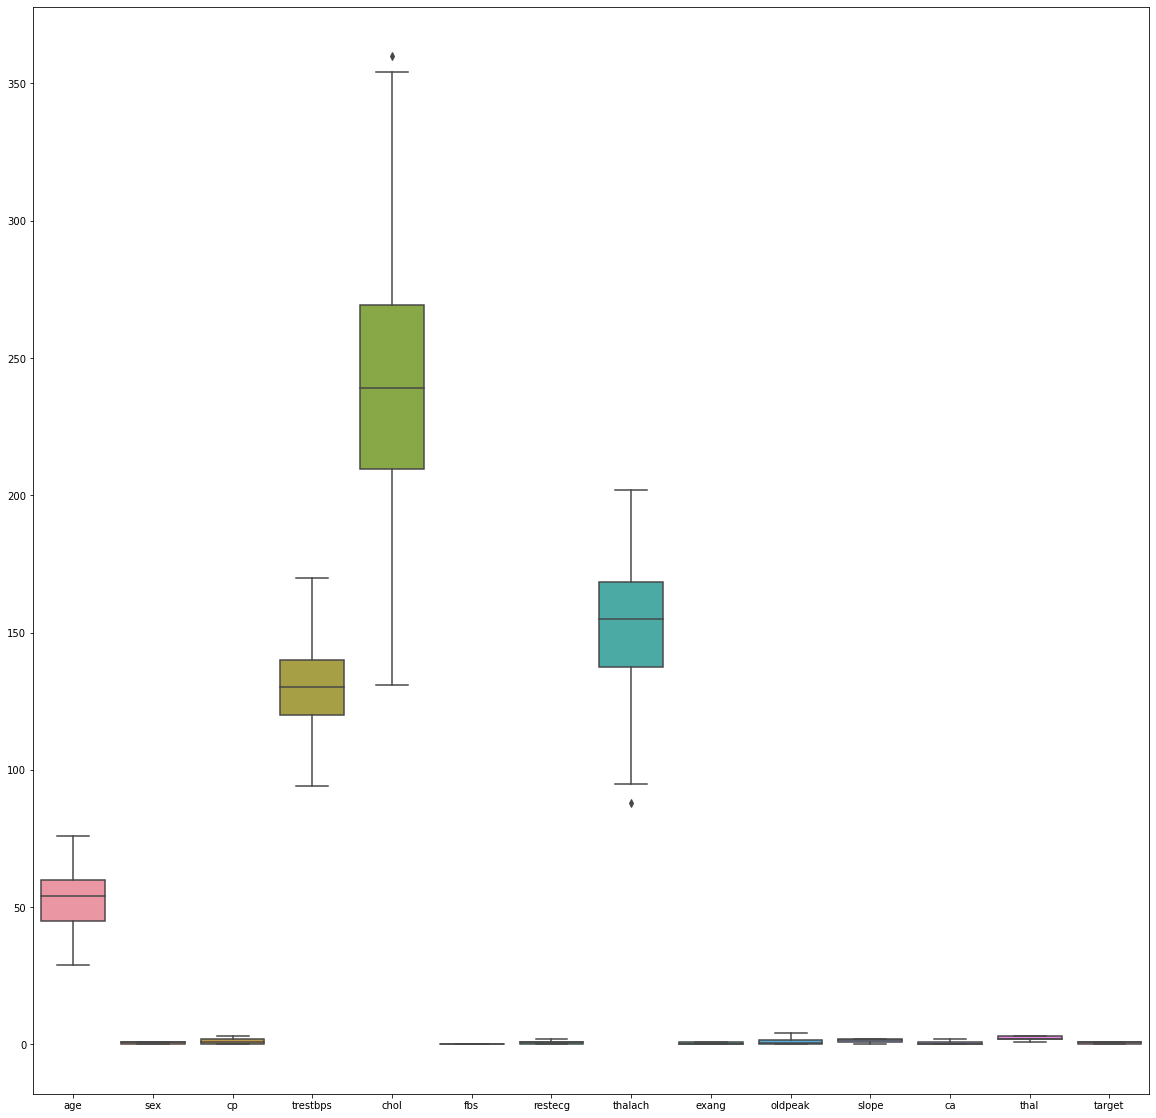

In [15]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

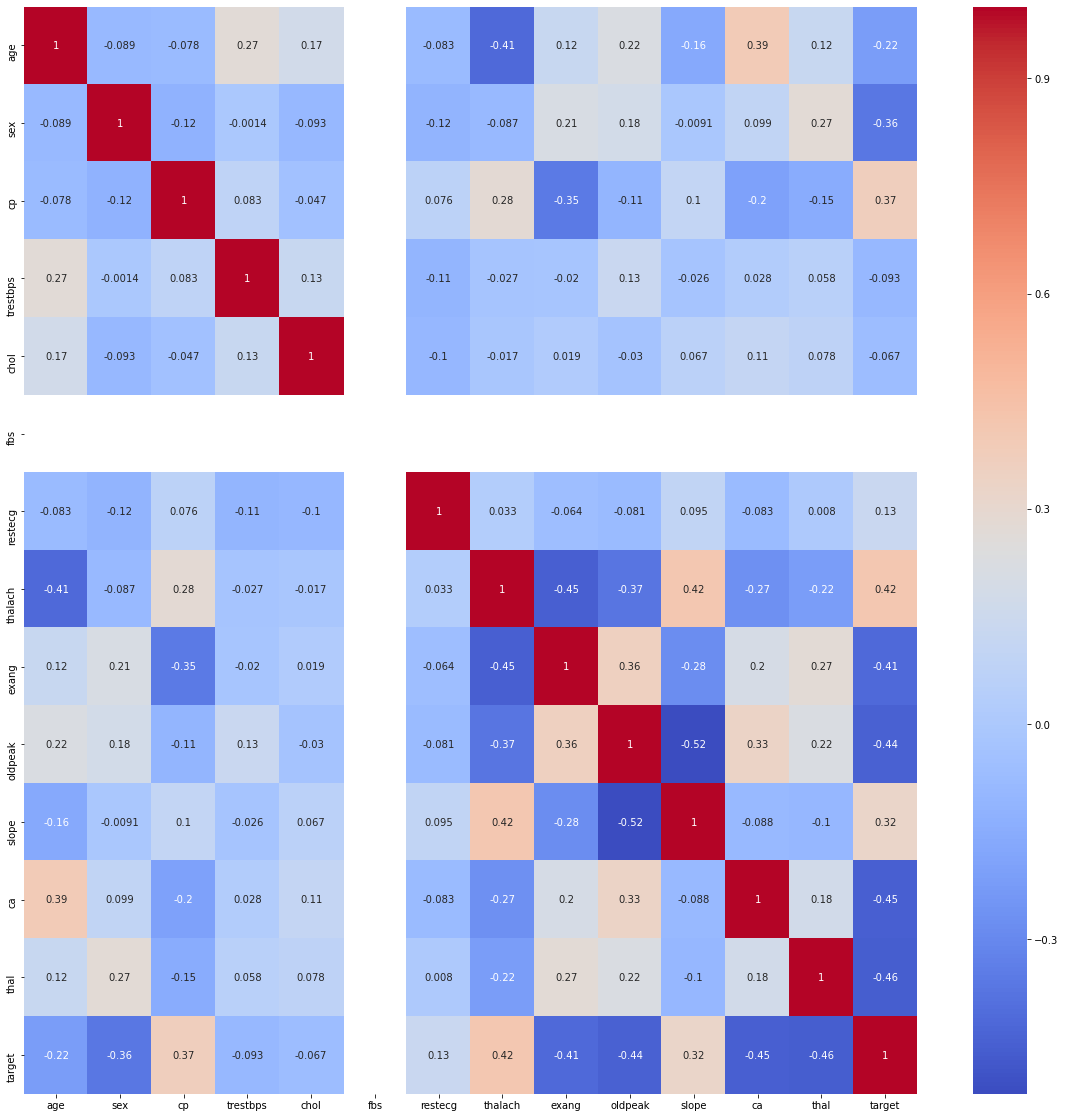

In [16]:
plt.figure(figsize=(20,20))
d = sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


In [18]:
# from sklearn.preprocessing import StandardScaler
# standardScaler = StandardScaler()
# #creating dummies variable
# dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca', 'thal'])
# #we have taken this columns for scle down
# columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [19]:
#dataset.head()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [20]:
#dataset.tail()
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
295,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
301,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [21]:
#dataset.describe()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


### Fitting into Models

In [22]:
#X = dataset.drop(['target'], axis =1)
#y = dataset['target']
X =df.drop(['target'], axis=1)
y =df['target']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### K - Nearest Neighbor Classifier

In [25]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
score = cross_val_score(knn_classifier, X_train, y_train, cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.782608695652174

In [26]:
score.mean()

0.5815789473684211

In [27]:
#Hypermatric tunning
knn_classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=1, weights='uniform')
knn_classifier.fit(X_train, y_train)
score=cross_val_score(knn_classifier, X_train, y_train, cv=10)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.8260869565217391

In [28]:
score=cross_val_score(knn_classifier, X_train, y_train, cv=10)
score.mean()

0.614327485380117

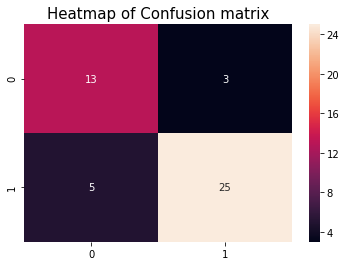

In [29]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.title("Heatmap of Confusion matrix", fontsize = 15)
sns.heatmap(cm, annot=True)
plt.show()

In [30]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.89      0.83      0.86        30

    accuracy                           0.83        46
   macro avg       0.81      0.82      0.81        46
weighted avg       0.83      0.83      0.83        46



## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8260869565217391

In [32]:
score=cross_val_score(rf_classifier, X_train, y_train, cv=10)
score.mean()

0.8073099415204679

In [33]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.92      0.80      0.86        30

    accuracy                           0.83        46
   macro avg       0.81      0.84      0.82        46
weighted avg       0.85      0.83      0.83        46



## XGBoost Classifier

In [34]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_by_level=1, colsample_bynode=0.1, 
                               colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_delta_step=0, max_depth=15, min_child_weight=1,
                               missing=None, n_estimators=100, n_jobs=1, nthread=None, objectives='binary:logistic', random_state=23,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=None, subsample=1, verbosity=1)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb =xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

C:\Users\Subodh\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Subodh\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text))


[11:53:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_by_level, objectives } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.9130434782608695

In [35]:
score=cross_val_score(xgb_classifier, X_train, y_train, cv=10)
score.mean()

[11:53:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_by_level, objectives } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:53:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_by_level, objectives } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:53:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_by_level, objectives } might not be used.

  This may not 

0.8190058479532165

In [36]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.93      0.93      0.93        30

    accuracy                           0.91        46
   macro avg       0.90      0.90      0.90        46
weighted avg       0.91      0.91      0.91        46



## AdaBoost with Random Forest

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
ada_classifier = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)

In [38]:
y_pred_adb = ada_classifier.predict(X_test)
accuracy_score(y_test, y_pred_adb)

0.8695652173913043

In [39]:
score=cross_val_score(ada_classifier, X_train, y_train, cv=10)
score.mean()

0.795906432748538

In [40]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.93      0.87      0.90        30

    accuracy                           0.87        46
   macro avg       0.85      0.87      0.86        46
weighted avg       0.88      0.87      0.87        46



## Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_classifier = GradientBoostingClassifier()
gbc_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [42]:
y_pred_gbc = gbc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.9130434782608695

In [43]:
score=cross_val_score(gbc_classifier, X_train, y_train)
score.mean()

0.8190690690690691

In [44]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.96      0.90      0.93        30

    accuracy                           0.91        46
   macro avg       0.90      0.92      0.91        46
weighted avg       0.92      0.91      0.91        46



In [45]:
print(X_test)
print(y_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
173   60    1   0       130   206    0        0      132      1      2.4   
123   54    0   2       108   267    0        0      167      0      0.0   
45    52    1   1       120   325    0        1      172      0      0.2   
65    35    0   0       138   183    0        1      182      0      1.4   
267   54    1   0       122   286    0        0      116      1      3.2   
7     44    1   1       120   263    0        1      173      0      0.0   
285   59    1   3       134   204    0        1      162      0      0.8   
211   39    1   0       118   219    0        1      140      0      1.2   
241   64    1   0       145   212    0        0      132      0      2.0   
199   44    1   0       110   197    0        0      177      0      0.0   
4     57    0   0       120   354    0        1      163      1      0.6   
284   46    1   0       140   311    0        1      120      1      1.8   
104   50    

### Testing the model

In [46]:
amit = ada_classifier.predict([[64,1,2,125,309,0,1,131,1,1.8,1,0,3]])
print(amit)



[0]


## Conclusion

We can see that AdaBoostClassifier when uses RandomForestClassifier produces the highest accuracy , so we will are using AdaBoostClassifier for importing into pickle, and later exporting for predicting the outputs for Heart dusease detection